In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

### this is just utility to visualize central limit theorem by considering numeric feature as population and drawing samples from it calculate a statistical measure

In [3]:
df=pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


##### whichever statistical measure we calculate , it cannot be told as exact and accurate for our numerical feature , it may have some error , this happens in the most cases where our numeric feature is treated as population for inferential stats and hypothesis testing , the measure having value x that we have calculated can be said as having 95% confidence level when , if randomly we draw 100 times samples of equal size and calculate that measure from them , then 95 times we will get same value x , but in remaining 5 samples we can get lesser measure value called as low , or higher measure value called as high due to biasing in those 5 samples
##### this [ low - high ] is called as confidence interval of that statiscal measure for the population , and the calculated value x is at that % confidence level , and thus value of that measure calculated from any randomly taken sample calculated at that % confidence level , lies always in that confidence interval
##### see below example of std deviation of df['raisehands'] , we are calculating std deviation from 100 equal sized samples from it ,  then we plot those values as bootstrap distribution ,for applying central limit theorem on those values as estimate the std deviation for df['raisehands'] as population

In [21]:
df['raisedhands'].std()#population std deviation

30.7792225827342

In [23]:
res=stats.bootstrap(data=(df['raisedhands'],),statistic=np.std,confidence_level=0.95,n_resamples=100)

In [24]:
res.confidence_interval

ConfidenceInterval(low=29.940473805531738, high=31.837591411822856)

<Axes: ylabel='Count'>

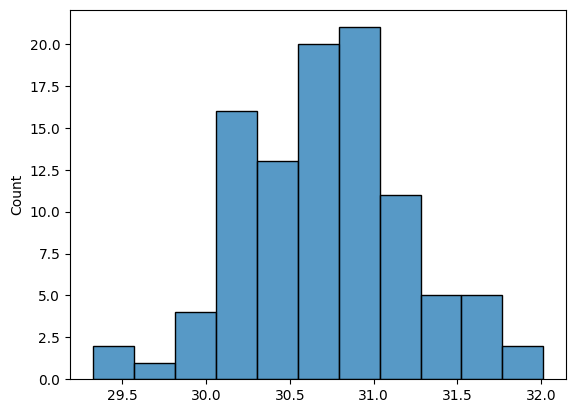

In [26]:
sns.histplot(res.bootstrap_distribution)

###### estimated population std deviation , i.e. estimated df['raisedhands'] std deviation by taking measuring it from 100 samples

In [29]:
res.bootstrap_distribution.mean()

30.699951256468612

#### this concept can be very well extended when our population cannot be actually measured , and we have only samples as numeric features , hence we need to multiple times get values for our numeric features and then find their values of statiscal measure, then apply togetherly central limit theorem , and get estimate of population's statiscal measure by taking those statiscal measure values mean